### Gutenberg plot analysis - sentences

In [1]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
# Download NLTK data (run this once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/h6x/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/h6x/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/h6x/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Loading the data

In [3]:
# List of text files (replace with actual file paths)
base_path = "/Users/h6x/ORNL/git/learning/natural language processing/CS-524/project_1/data"
file_paths = [base_path + "/Great_short_stories_V1.txt", base_path + "/The_Memoirs_of_Sherlock_Holmes.txt", base_path + "/The_Return_of_Sherlock_Holmes.txt"]

In [4]:
book_contents=[]

# Read the contents of each book
for file_path in file_paths:
    with open(file_path, 'r') as file:
        book_contents.append(file.read())

#### Data Preprocessing

In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

[nltk_data] Downloading package punkt to /Users/h6x/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/h6x/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/h6x/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/h6x/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/h6x/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
import re

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [7]:
from nltk.tokenize import sent_tokenize

In [8]:
def clean_text_by_sentence(text):
    lemmatizer = WordNetLemmatizer()
    sub_pattern = r'[^A-Za-z]'
    stop_words = stopwords.words('english') + ['never','ever','couldnot','wouldnot','could','would','us',"i'm","you'd"]

    # Split the text into sentences
    sentences = sent_tokenize(text)

    # Clean and tokenize each sentence
    cleaned_sentences = []
    for sentence in sentences:
        # Lowercasing and removing special characters
        lower_sentence = sentence.lower()
        filtered_sentence = re.sub(sub_pattern, ' ', lower_sentence).lstrip().rstrip()
        
        # Tokenize the sentence into words
        words = word_tokenize(filtered_sentence)
        
        # Lemmatize and remove stopwords
        cleaned_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words if word not in stop_words]
        
        # Append the cleaned words as a sentence (list of words)
        if cleaned_words:  # Avoid empty sentences
            cleaned_sentences.append(cleaned_words)

    return cleaned_sentences

In [9]:
# Process each book and keep sentence context
cleaned_books_sentences = []
for book in book_contents:
    cleaned_books_sentences.extend(clean_text_by_sentence(book))  # List of list (sentences of tokens)

In [10]:
print(cleaned_books_sentences[:2])  # View the first two tokenized sentences

[['project', 'gutenberg', 'ebook', 'great', 'short', 'story', 'volume', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'state', 'part', 'world', 'cost', 'almost', 'restriction', 'whatsoever'], ['may', 'copy', 'give', 'away', 'use', 'term', 'project', 'gutenberg', 'license', 'include', 'ebook', 'online', 'www', 'gutenberg', 'org']]


# **FastText**

In [11]:
from gensim.models import FastText
from gensim.utils import tokenize

In [12]:
#sg ({0, 1}, optional) – Training algorithm: 1 for skip-gram; otherwise CBOW

# Skip-gram (sg=1)
skipgram_model = FastText(sentences=cleaned_books_sentences, vector_size=10, window=2, min_count=1, sg=1, epochs=10)

In [13]:
skipgram_model.wv.most_similar("holmes")

[('lestrade', 0.9754316806793213),
 ('hopkins', 0.9587504863739014),
 ('sholto', 0.9542666673660278),
 ('hopkin', 0.9540185332298279),
 ('sholtos', 0.9514622688293457),
 ('jones', 0.9508529305458069),
 ('inspector', 0.943796694278717),
 ('hard', 0.9367233514785767),
 ('holly', 0.9364287853240967),
 ('trevelyan', 0.9330723881721497)]

In [14]:
skipgram_model.wv.most_similar("crime")

[('incident', 0.9970386624336243),
 ('crimea', 0.996401846408844),
 ('coincident', 0.9938011765480042),
 ('conscience', 0.9935654401779175),
 ('consequence', 0.9934936761856079),
 ('absurdity', 0.9922710657119751),
 ('deny', 0.9920032620429993),
 ('inexperience', 0.9916309118270874),
 ('sequence', 0.9914080500602722),
 ('coincidence', 0.9910051226615906)]

In [15]:
# CBOW (sg=0)
cbow_model = FastText(sentences=cleaned_books_sentences, vector_size=10, window=2, min_count=1, sg=0, epochs=10)

In [16]:
cbow_model.wv.most_similar("holmes")

[('rolles', 0.9577099680900574),
 ('james', 0.9393850564956665),
 ('soames', 0.9346895217895508),
 ('sholto', 0.9243254661560059),
 ('hasbrouck', 0.9243070483207703),
 ('nimes', 0.9238337278366089),
 ('jones', 0.9223694801330566),
 ('zabriskie', 0.9217298626899719),
 ('hayes', 0.91922926902771),
 ('xerxes', 0.9185937643051147)]

In [17]:
cbow_model.wv.most_similar("crime")

[('recourse', 0.9986268877983093),
 ('test', 0.9978678822517395),
 ('disbelieve', 0.9978318810462952),
 ('invest', 0.9977752566337585),
 ('course', 0.9975212812423706),
 ('divest', 0.996706485748291),
 ('daintiest', 0.9965317249298096),
 ('necessary', 0.9965070486068726),
 ('uncertainty', 0.9964390993118286),
 ('exist', 0.9963881969451904)]

In [18]:
# Get vector embedding for a word (e.g., 'Formula')
word_embedding_cbow = cbow_model.wv['crime']
print("Word embedding for 'crime' using CBOW:", word_embedding_cbow)

Word embedding for 'crime' using CBOW: [ 1.140225    0.2320771  -0.90640706 -1.2469455   0.37036446  0.8204573
  1.8763874   1.6139325   0.45742318 -1.7194611 ]


### Character and Event Representation Using Word Embeddings

In [19]:
import spacy

# Load spaCy model for NER
nlp = spacy.load("en_core_web_sm")

In [20]:
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in ["PERSON", "GPE", "EVENT"]]
    return entities

In [21]:
cleaned_books_text = [' '.join(sentences) for sentences in cleaned_books_sentences]

In [22]:
entities = [extract_entities(book) for book in cleaned_books_text]

In [23]:
entities

[[],
 [],
 [],
 [('william', 'PERSON'),
  ('al haines', 'PERSON'),
  ('robert louis stevenson', 'PERSON'),
  ('william', 'PERSON'),
  ('france', 'GPE'),
  ('america', 'GPE'),
  ('edgar allan', 'PERSON'),
  ('edgar allan', 'PERSON'),
  ('arthur conan', 'PERSON')],
 [],
 [],
 [],
 [('bald head', 'PERSON')],
 [],
 [('episode barrel', 'PERSON')],
 [],
 [],
 [],
 [],
 [('jonathan small', 'PERSON'),
  ('arthur conan', 'PERSON'),
  ('doyle', 'PERSON'),
  ('anna katharine', 'PERSON'),
  ('robert louis stevenson', 'PERSON'),
  ('prince florizel', 'GPE'),
  ('edgar allan', 'PERSON')],
 [],
 [],
 [],
 [],
 [('edgar allan', 'PERSON'), ('thomas browne mental', 'PERSON')],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [('manifold multiform', 'PERSON')],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [('paris', 'GPE')],
 [],
 [],
 [('paris', 'GPE')],
 [],
 [],
 [],
 [],
 [('paris', '

In [25]:
# Initialize lists to hold extracted PERSON and GPE entities
persons = []
gpes = []

In [26]:
# Iterate over each entry in the data
for entry in entities:
    if entry:  # Check if the entry is not empty
        persons.extend([name for name, entity in entry if entity == 'PERSON'])
        gpes.extend([name for name, entity in entry if entity == 'GPE'])

In [27]:
# Filter out empty lists if needed
persons = [p for p in persons if p]
gpes = [g for g in gpes if g]

In [28]:
# Print the results
print("Persons:", persons)
print("GPEs:", gpes)

Persons: ['william', 'al haines', 'robert louis stevenson', 'william', 'edgar allan', 'edgar allan', 'arthur conan', 'bald head', 'episode barrel', 'jonathan small', 'arthur conan', 'doyle', 'anna katharine', 'robert louis stevenson', 'edgar allan', 'edgar allan', 'thomas browne mental', 'manifold multiform', 'rue st dennis become stage mad attempt', 'nichols', 'gazette de tribunaux follow', 'mademoiselle camille', 'pauline dubourg', 'pierre moreau', 'jules mignaud', 'bon clerk mignaud', 'william bird tailor', 'paul duma', 'alexandre etienne surgeon', 'quartier st roch', 'bon arrest imprison', 'bon imprison', 'dim proportion', 'gazette de tribunaux', 'manifold je', 'gazette', 'suppose gruff voice', 'rod', 'maison de', 'madman nation', 'description digit', 'animal orang outang specie mention', 'orang outang', 'tawny orang outang bornese specie', 'orang outang', 'orang outang great', 'bois de boulogne', 'orang outang', 'orang outang sprang door chamber stair', 'shutter kick open', 'orang

Analyze relationships between key characters, places, and events

In [57]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
from collections import Counter

In [38]:
character_counts = Counter(persons)
top_characters = character_counts.most_common(10)  # Get top 10 characters
print("Top characters:", top_characters)

Top characters: [('watson', 68), ('bush', 25), ('anderson', 24), ('harry', 23), ('smith', 21), ('sarah', 19), ('dr zabriskie', 18), ('duncan', 18), ('peter carey', 18), ('hudson', 17)]


In [40]:
place_counts = Counter(gpes)
top_places = place_counts.most_common(10)  # Get top 10 characters
print("Top places:", top_places)

Top places: [('london', 162), ('paris', 46), ('india', 18), ('scotland', 17), ('new york', 15), ('maid', 13), ('france', 11), ('overton', 11), ('acton', 10), ('blessington', 10)]


Compute similarity scores between characters to understand their semantic proximity in the text.

In [50]:
#Prepare the embeddings by flattening each 2D array into a 1D vector
character_embeddings = {}
for character in top_characters:
    if character in cbow_model.wv:  # Check if the character exists in the raw embeddings
        character_embeddings[character] = cbow_model.wv[character].flatten()

# Convert to 2D array
embeddings = np.array(list(character_embeddings.values()))

In [51]:
# Check the shape to confirm it's 2D
print("Embeddings shape:", embeddings.shape)  # Should be (num_characters, embedding_dim)

Embeddings shape: (10, 20)


In [52]:
similarity_matrix = cosine_similarity(embeddings)

In [54]:
# Generate a DataFrame for better visualization
similarity_df = pd.DataFrame(similarity_matrix, index=top_characters, columns=top_characters)

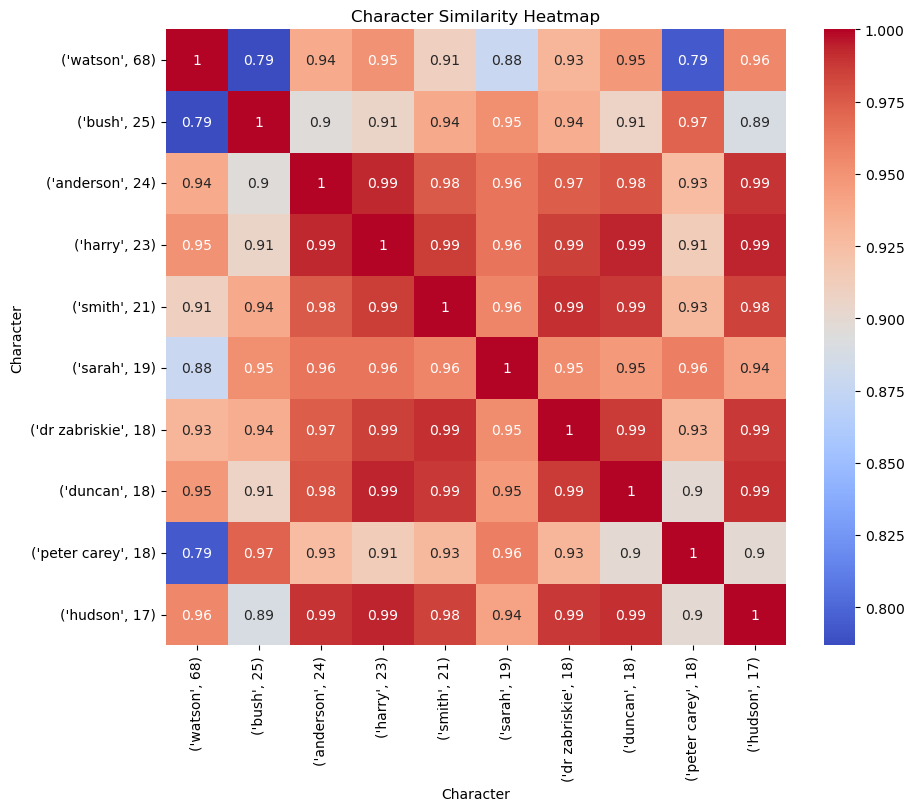

In [58]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=True, cmap='coolwarm', xticklabels=True, yticklabels=True)
plt.title("Character Similarity Heatmap")
plt.xlabel("Character")
plt.ylabel("Character")
plt.show()

Identify clusters of semantically similar words to find patterns related to crime and investigation.

In [73]:
cbow_model.wv.most_similar("crime")

[('recourse', 0.9986268877983093),
 ('test', 0.9978678822517395),
 ('disbelieve', 0.9978318810462952),
 ('invest', 0.9977752566337585),
 ('course', 0.9975212812423706),
 ('divest', 0.996706485748291),
 ('daintiest', 0.9965317249298096),
 ('necessary', 0.9965070486068726),
 ('uncertainty', 0.9964390993118286),
 ('exist', 0.9963881969451904)]

In [77]:
crime_similar_word_list = [word for word, _ in cbow_model.wv.most_similar("crime")]

In [81]:
crime_similar_word_list

['recourse',
 'test',
 'disbelieve',
 'invest',
 'course',
 'divest',
 'daintiest',
 'necessary',
 'uncertainty',
 'exist']

In [80]:
investigation_similar_word_list = [word for word, _ in cbow_model.wv.most_similar("investigation")]

In [82]:
investigation_similar_word_list

['gesticulation',
 'destination',
 'extraction',
 'supererogation',
 'introduction',
 'restitution',
 'recognition',
 'misconception',
 'explanation',
 'exaction']

In [83]:
words_of_interest = ['crime', 'investigation'] + investigation_similar_word_list + crime_similar_word_list

In [84]:
# Filter embeddings for words of interest
filtered_embeddings = {word: cbow_model.wv[word] for word in words_of_interest if word in cbow_model.wv}


In [85]:
# Prepare the data for clustering
embeddings_matrix = np.array([embedding.flatten() for embedding in filtered_embeddings.values()])

In [86]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [87]:
# Step 1: Perform K-means clustering
num_clusters = min(3, len(filtered_embeddings))  # Set to 3 or the number of words available
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(embeddings_matrix)

/Users/h6x/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [88]:
# Get the cluster labels
labels = kmeans.labels_

# Step 2: Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_matrix)

In [89]:
# Create a DataFrame for visualization
cluster_df = pd.DataFrame(reduced_embeddings, columns=['PCA1', 'PCA2'])
cluster_df['Label'] = labels
cluster_df['Word'] = words_of_interest

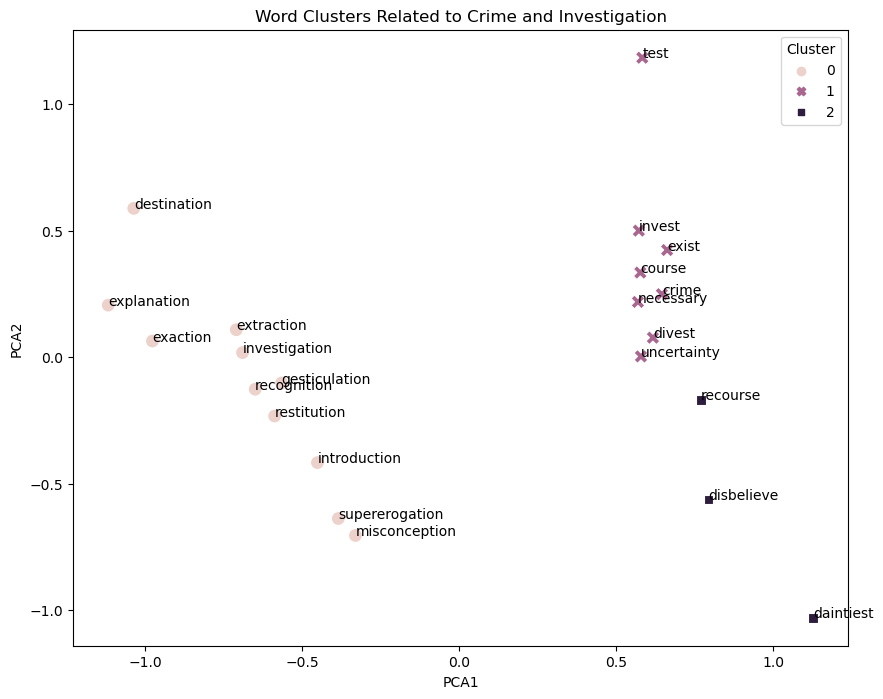

In [90]:
# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(data=cluster_df, x='PCA1', y='PCA2', hue='Label', style='Label', s=100)
for line in range(0, cluster_df.shape[0]):
    plt.text(cluster_df.PCA1[line], cluster_df.PCA2[line], cluster_df.Word[line], horizontalalignment='left', size='medium')
plt.title('Word Clusters Related to Crime and Investigation')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()